In [5]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("muted") # "deep", "muted", "colorblind"

plt.rcParams.update({
    "text.usetex": False,
    "font.size": 10,
    "axes.labelsize": 10,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": [3.5, 2.5],
    "savefig.dpi": 300,
    "savefig.bbox": "tight",
})

Saved plot to /home/aikusrv02/_PROJECTS/wonjunoh/assignment1-basics-solution/results/lr_sweep.png


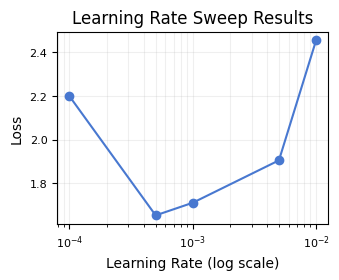

In [6]:
sweep_res = json.load(open(os.path.join(os.getcwd(), "sweep_lr_results.json"), "r"))
df = pd.DataFrame(sweep_res)


plt.plot(df['learning_rate'], df['final_loss'], marker='o')

plt.xscale('log')

plt.grid(True, which="both", ls="-", alpha=0.2)

plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Loss')
plt.title('Learning Rate Sweep Results')

fpath = os.path.join(os.getcwd(), "lr_sweep.png")
plt.savefig(fpath)
print(f"Saved plot to {fpath}")

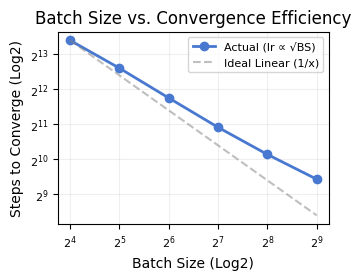

In [7]:
sweep_res = json.load(open(os.path.join(os.getcwd(), "sweep_batch_results.json"), "r"))
df = pd.DataFrame(sweep_res)

first_bs = df['batch_size'].iloc[0]
first_iter = df['total_iters'].iloc[0]
ideal_iters = [first_iter * (first_bs / b) for b in df['batch_size']]

plt.plot(df['batch_size'], df['total_iters'], marker='o', linestyle='-', linewidth=2, label='Actual (lr ∝ √BS)')
plt.plot(df['batch_size'], ideal_iters, color='gray', linestyle='--', alpha=0.5, label='Ideal Linear (1/x)')

plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.grid(True, which="both", ls="-", alpha=0.2)

plt.xlabel('Batch Size (Log2)')
plt.ylabel('Steps to Converge (Log2)')
plt.title('Batch Size vs. Convergence Efficiency')
plt.legend()

fpath = os.path.join(os.getcwd(), "batch_sweep.png")
plt.savefig(fpath)
plt.show()

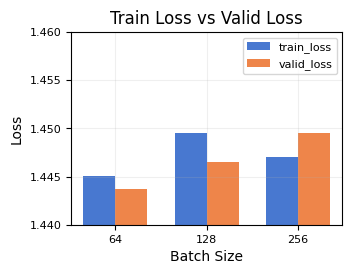

In [8]:
train_res = json.load(open(os.path.join(os.getcwd(), "train.json"), "r"))
valid_res = json.load(open(os.path.join(os.getcwd(), "valid.json"), "r"))

train_df = pd.DataFrame(train_res)
valid_df = pd.DataFrame(valid_res)

train_df = train_df.rename(columns={'final_loss': 'train_loss'})

merged_df = pd.merge(train_df, valid_df, left_on='run_name', right_on='run_name')

plt.figure()
x = np.arange(len(merged_df['run_name']))
width = 0.35

plt.bar(x - width/2, merged_df['train_loss'], width, label='train_loss')
plt.bar(x + width/2, merged_df['valid_loss'], width, label='valid_loss')
plt.ylim(1.44, 1.46)
plt.xlabel('Batch Size')
plt.ylabel('Loss')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.title('Train Loss vs Valid Loss')
plt.xticks(x, merged_df['batch_size'])
plt.legend()

fpath = os.path.join(os.getcwd(), "train_result.png")
plt.savefig(fpath)
plt.show()
